#### Customer Churn Prediction

#### Importing Libraries

In [76]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import GradientBoostingClassifier


In [2]:
df = pd.read_csv('/content/Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [8]:
df.drop(['RowNumber','CustomerId', 'Surname'],axis=1,inplace=True)
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [12]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


<ipython-input-21-21e202d1a5fb>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Exited', data=df, palette='viridis')


Text(0, 0.5, 'Count')

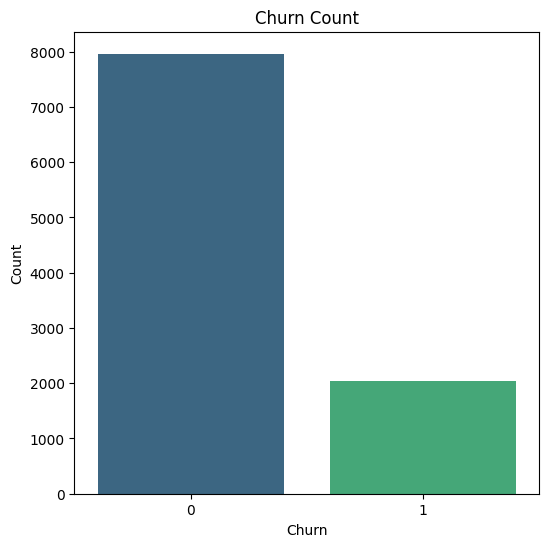

In [21]:
plt.figure(figsize=(6,6))
sns.countplot(x='Exited', data=df, palette='viridis')
plt.title('Churn Count')
plt.xlabel('Churn')
plt.ylabel('Count')


In [22]:
# Differentiating between continuous and categorical variables
continuous =  ['Age', 'CreditScore', 'Balance', 'EstimatedSalary']
categorical = ['Geography', 'Gender', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']

print('Continuous: ', ', '.join(continuous))
print('Categorical: ', ', '.join(categorical))

Continuous:  Age, CreditScore, Balance, EstimatedSalary
Categorical:  Geography, Gender, Tenure, NumOfProducts, HasCrCard, IsActiveMember


In [23]:
df_continuous = df[continuous]

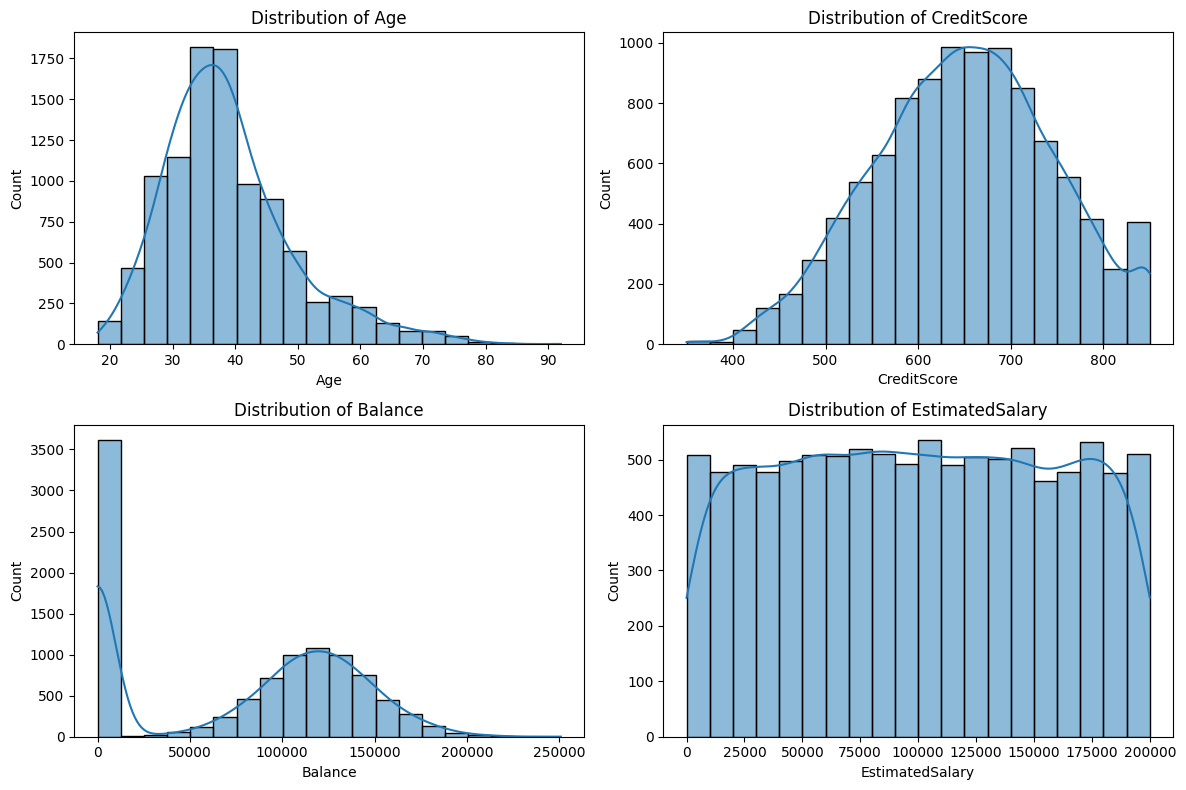

In [24]:
#Visualizing the continuous variables
plt.figure(figsize=(12, 8))
for i, column in enumerate(df_continuous.columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df_continuous[column], kde=True, bins=20)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')

plt.tight_layout()

In [28]:
# calculating the correlation matrix of a continuous datas
correlation_matrix = df_continuous.corr()


Text(0.5, 1.0, 'Correlation Heatmap for Continuous Variables')

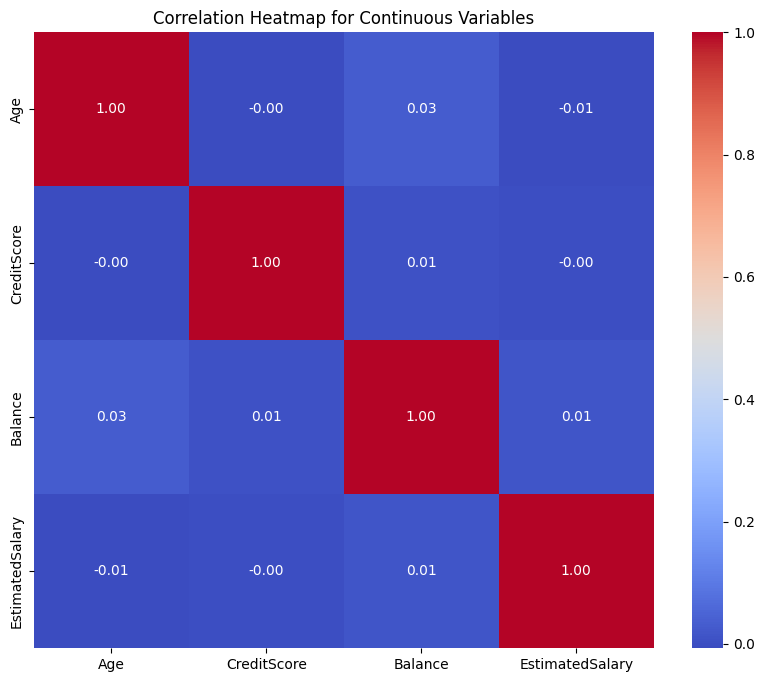

In [29]:
#compute the standard correlation coefficient between ever pair of continuous features
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap for Continuous Variables')

In [30]:
# Categorical variables
df_categorical = df[categorical]

<ipython-input-31-ed89c3aa1143>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df_categorical, palette='muted')
<ipython-input-31-ed89c3aa1143>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df_categorical, palette='muted')
<ipython-input-31-ed89c3aa1143>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df_categorical, palette='muted')
<ipython-input-31-ed89c3aa1143>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x`

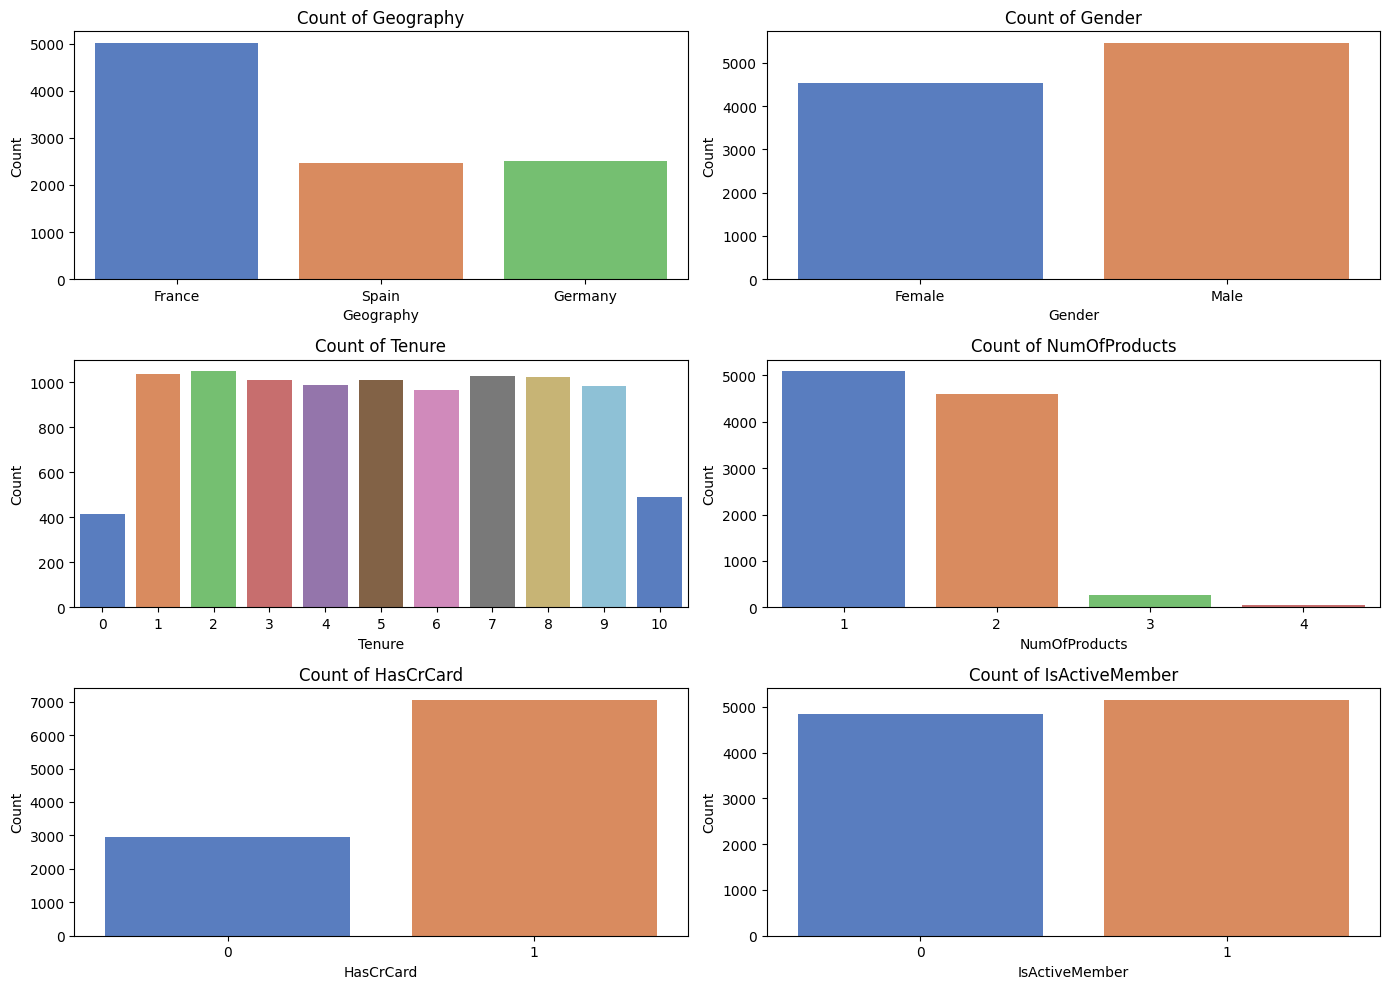

In [31]:
# Visualizing categorical variables
plt.figure(figsize=(14, 10))
for i, column in enumerate(df_categorical.columns, 1):
    plt.subplot(3, 2, i)
    sns.countplot(x=column, data=df_categorical, palette='muted')
    plt.title(f'Count of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')

plt.tight_layout()

#### Data preprocessing

In [34]:
df_categorical = df[categorical + ['Exited']]


In [40]:
# creating an empty dictionary to store results
chi2_results ={}
for column in categorical:
  contingency_table = pd.crosstab(df_categorical[column], df_categorical['Exited'])
  chi2, p, _, _ = chi2_contingency(contingency_table)
  chi2_results[column] = {'Chi2': chi2, 'P-value': p}

for column, results in chi2_results.items():
    print(f"Feature: {column}, Chi2: {results['Chi2']:.5f}, P-value: {results['P-value']:.10f}")



Feature: Geography, Chi2: 301.25534, P-value: 0.0000000000
Feature: Gender, Chi2: 112.91857, P-value: 0.0000000000
Feature: Tenure, Chi2: 13.90037, P-value: 0.1775846203
Feature: NumOfProducts, Chi2: 1503.62936, P-value: 0.0000000000
Feature: HasCrCard, Chi2: 0.47134, P-value: 0.4923723614
Feature: IsActiveMember, Chi2: 242.98534, P-value: 0.0000000000


Tenure and HasCrCard have small chi-square and greater than 0.1 p-value, drop this columns because it doesnot convey any useful information.

In [41]:
df = df.drop(['Tenure', 'HasCrCard'], axis=1)

In [42]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [44]:
# changing categorical values into numerical using label encoder
label_encoder = LabelEncoder()
categorical_columns= ['Geography','Gender']

In [45]:
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

In [46]:
df.head()

,CreditScore,Geography,Gender,Age,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,0.00,1,1,101348.88,1
1,608,2,0,41,83807.86,1,1,112542.58,0
2,502,0,0,42,159660.80,3,0,113931.57,1
3,699,0,0,39,0.00,2,0,93826.63,0
4,850,2,0,43,125510.82,1,1,79084.10,0


#### Feature Engineering
Standarization scales the features so that they have a mean of 0 and standard deviation of 1.

In [48]:
numerical_columns = ['Age', 'CreditScore', 'Balance', 'EstimatedSalary']
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])


#### Spliting training and testing data

In [53]:
features = df.drop('Exited', axis=1)
target = df['Exited']

In [54]:
target.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [66]:
feature_counts =df['Gender'].value_counts()

In [67]:
feature_counts

1    5457
0    4543
Name: Gender, dtype: int64

Text(0, 0.5, 'Count')

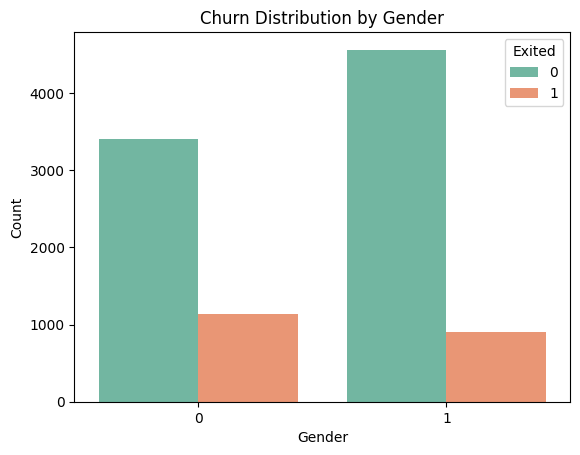

In [68]:
# Visualizing the relationship between Gender and Exited
sns.countplot(x='Gender', hue='Exited', data=df, palette='Set2')
plt.title('Churn Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

In [69]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
# Display the shape of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (8000, 8)
X_test shape: (2000, 8)
y_train shape: (8000,)
y_test shape: (2000,)


In [73]:
# Training the model using LogisticRegression

LRmodel = LogisticRegression(random_state = 42)
LRmodel.fit(X_train, y_train)

# making predictions on the testing data
y_pred = LRmodel.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred)
)
print("\nClassification Report:\n", classification_report(y_test, y_pred)
)


Accuracy: 0.815

Confusion Matrix:
 [[1560   47]
 [ 323   70]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.97      0.89      1607
           1       0.60      0.18      0.27       393

    accuracy                           0.81      2000
   macro avg       0.71      0.57      0.58      2000
weighted avg       0.78      0.81      0.77      2000



In [77]:
# Model training using RandomForest
RFmodel = RandomForestClassifier(random_state=42)
RFmodel.fit(X_train, y_train)

# making predictions on the testing data
y_pred = RFmodel.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred)
)
print("\nClassification Report:\n", classification_report(y_test, y_pred)
)

Accuracy: 0.8675

Confusion Matrix:
 [[1543   64]
 [ 201  192]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.49      0.59       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.76      2000
weighted avg       0.86      0.87      0.86      2000



In [78]:
# Using Gradient Boosting
grad_model = GradientBoostingClassifier(random_state=42)
grad_model.fit(X_train, y_train)

# making predictions on the testing data
y_pred = grad_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred)
)
print("\nClassification Report:\n", classification_report(y_test, y_pred)
)

Accuracy: 0.869

Confusion Matrix:
 [[1552   55]
 [ 207  186]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.77      0.47      0.59       393

    accuracy                           0.87      2000
   macro avg       0.83      0.72      0.75      2000
weighted avg       0.86      0.87      0.86      2000



Among all the model training algorithms Gradient Boosting has the highest accuracy of 86.9%